[ 3.64594310e+01 -1.08011188e-01  4.64203853e-02  2.05585940e-02
  2.68672959e+00 -1.77665832e+01  3.80985921e+00  6.92223550e-04
 -1.47556452e+00  3.06048997e-01 -1.23345745e-02 -9.52745731e-01
  9.31166861e-03 -5.24757551e-01]


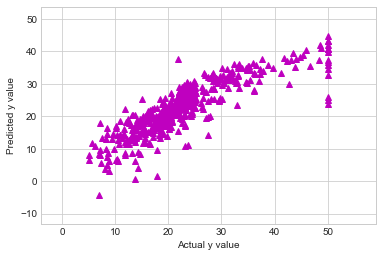

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def add_intercept(x):
    new_x = np.c_[np.ones(x.shape[0]), x]
    return new_x


def load_dataset(file_path):
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
                    'MEDV']

    df = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)
    n = len(df.columns)
    x_data = df.iloc[:, list(range(n - 1))]
    y_data = df.iloc[:, n - 1]
    x = np.array(x_data)
    y = np.array(y_data)
    return x, y


def plot(x, y, theta, save_path):
    # Plot the dataset
    plt.figure()
    plt.style.use('seaborn-whitegrid')

    # Plot the prediction values
    margin = (np.max(y) - np.min(y)) * 0.2
    x_pred = add_intercept(x)
    y_pred = x_pred.dot(theta)
    plt.plot(y, y_pred, 'm^', linewidth=2)

    plt.xlim(np.min(y) - margin, np.max(y) + margin)
    plt.ylim(np.min(y_pred) - margin, np.max(y_pred) + margin)
    plt.xlabel('Actual y value')
    plt.ylabel('Predicted y value')
    plt.savefig(save_path)
    plt.show()


class LinearRegression2:
    def __init__(self):
        self.theta = None

    def fit(self, x, y, learning_rate):
        x = add_intercept(x)
        m, n = x.shape
        self.theta = np.zeros(n)

        # Newton Raphson
        while True:
            last_theta = np.copy(self.theta)
            h_x = x.dot(self.theta)
            gradient = x.T.dot(y - h_x)
            hessian = x.T.dot(x)

            #Update theta
            self.theta += learning_rate / m * np.linalg.inv(hessian).dot(gradient)

            # Terminate
            eps = np.linalg.norm(self.theta - last_theta, ord=1)
            if eps < 10**(-7):
                break

        return self.theta

    def predict(self, inp):
        return self.theta.T.dot(add_intercept(inp))


x, y = load_dataset(file_path=r"housing.csv")
model_1 = LinearRegression2()
theta = model_1.fit(x, y, learning_rate=0.5)
print(theta)
plot(x, y, theta, save_path="Problem3.png")



